# Metin Sınıflandırma

In [39]:
import pandas as pd
import on_islem
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("data/metin_siniflandirma.csv",index_col=0)
df["Text_2"] = df["Text"].apply(on_islem.pre_processing)
df["Text_2"] = df["Text_2"].apply(on_islem.remove_space)
df["Text_3"] = [' '.join(wrd for wrd in x) for x in df["Text_2"]]

df_index = df[df["Text_2"].str[0].isnull()].index
df = df.drop(df_index)
df = df.reset_index()
del df["index"]
df.head()

,Text,Label,Text_2,Text_3
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal oğl kand...
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, kal]",sebep di bağıracak kal
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, yıl, çıkar, boku, mal, ne...",black friday amk yıl çıkar boku mal nesiniz
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal


In [3]:
df.groupby("Label").size()

Label
korku      800
kızgın     799
mutlu      800
surpriz    800
üzgün      799
dtype: int64

In [4]:
#from sklearn.model_selection import train_test_split

In [5]:
msg_train,msg_test,label_train,label_test = train_test_split(df["Text_3"].tolist(),df["Label"].tolist(),test_size=0.2,random_state=42)

In [6]:
len(msg_train)

3198

In [7]:
len(msg_test)

800

In [8]:
len(label_train)

3198

In [9]:
df_test = pd.DataFrame({"text":msg_test,"label":label_test})
df_test.groupby("label").size()

label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

In [10]:
#from sklearn.svm import LinearSVC
#from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
svm = Pipeline([('vect',TfidfVectorizer()),('svm',LinearSVC())])

In [12]:
svm.fit(msg_train,label_train)
y_pred_class = svm.predict(msg_test)

In [13]:
#from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [14]:
print("svm accurary score: ", accuracy_score(label_test,y_pred_class))

svm accurary score:  0.98


In [15]:
print("svm f1 score: ", f1_score(label_test,y_pred_class,average="weighted"))

svm f1 score:  0.9800012002533918


In [16]:
len(label_test)

800

In [17]:
800*0.98

784.0

In [18]:
df_test.groupby("label").size()

label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

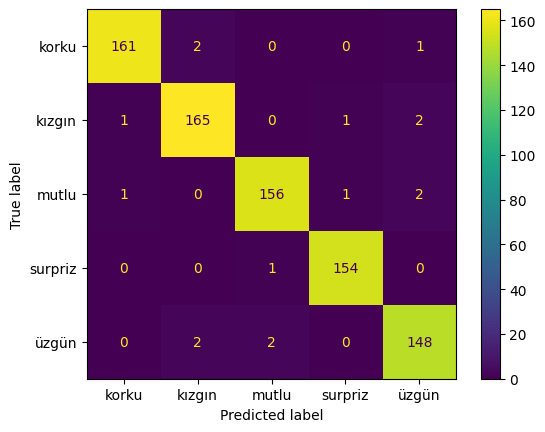

In [19]:
cm = confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

In [20]:
# örnek veri testi

msg_test_2 = ["ben biraz kötü gibiyim"]
y_pred_class = svm.predict(msg_test_2)
y_pred_class

array(['üzgün'], dtype='<U7')

In [ ]:
"""""
msg_test_3 = ["ben bugün çok heyecanlıyım"]
y_pred_class = svm.predict(msg_test_3)
y_pred_class

msg_test_4 = ["benim bugün midem ağrıyor"]
y_pred_class = svm.predict(msg_test_4)
y_pred_class
"""""

In [21]:
df.head()

,Text,Label,Text_2,Text_3
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal oğl kand...
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, kal]",sebep di bağıracak kal
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, yıl, çıkar, boku, mal, ne...",black friday amk yıl çıkar boku mal nesiniz
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal


In [24]:
#from gensim.models import Word2Vec

model = Word2Vec.load("data/word2vec.model")

model.build_vocab(df["Text_2"].tolist(),update=True)

model.save("data/word2vec.model")

In [25]:
df["word2vec"] = df["Text_2"].apply(on_islem.word2vec)
df.head()

,Text,Label,Text_2,Text_3,word2vec
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...,"[-0.008806506171822548, 0.014438025653362274, ..."
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal oğl kand...,"[-0.005688711069524288, 0.006641902029514313, ..."
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, kal]",sebep di bağıracak kal,"[-0.004658500663936138, 0.012888907454907894, ..."
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, yıl, çıkar, boku, mal, ne...",black friday amk yıl çıkar boku mal nesiniz,"[-0.006559002213180065, 0.00727614713832736, -..."
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal,"[-0.009965620934963226, 0.012200167402625084, ..."


In [26]:
msg_train,msg_test,label_train,label_test = train_test_split(df["word2vec"].tolist(),df["Label"].tolist(),test_size=0.2,random_state=42)
svm = Pipeline([('svm',LinearSVC())])
svm.fit(msg_train,label_train)
y_pred_class = svm.predict(msg_test)

print("svm accurary score: ", accuracy_score(label_test,y_pred_class))
print("svm f1 score: ", f1_score(label_test,y_pred_class,average="weighted"))

svm accurary score:  0.4525
svm f1 score:  0.44793278663188796


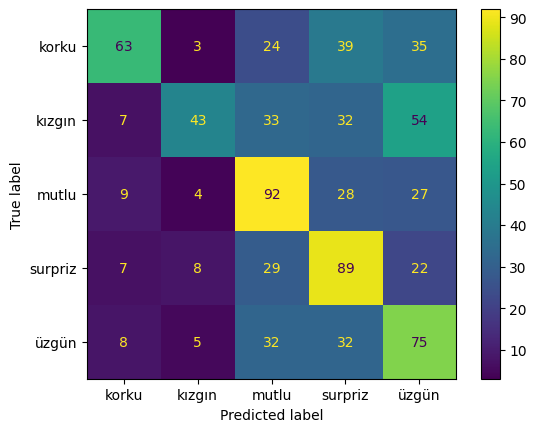

In [27]:
cm = confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

In [30]:
df.head()

,Text,Label,Text_2,Text_3,word2vec
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...,"[-0.008806506171822548, 0.014438025653362274, ..."
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal oğl kand...,"[-0.005688711069524288, 0.006641902029514313, ..."
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, kal]",sebep di bağıracak kal,"[-0.004658500663936138, 0.012888907454907894, ..."
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, yıl, çıkar, boku, mal, ne...",black friday amk yıl çıkar boku mal nesiniz,"[-0.006559002213180065, 0.00727614713832736, -..."
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal,"[-0.009965620934963226, 0.012200167402625084, ..."


In [31]:
from sklearn.neighbors import KNeighborsClassifier

msg_train,msg_test,label_train,label_test = train_test_split(df["Text_3"].tolist(),df["Label"].tolist(),test_size=0.2,random_state=42)
knn = Pipeline([('vect',TfidfVectorizer()),('knn',KNeighborsClassifier())])
knn.fit(msg_train,label_train)
y_pred_class = knn.predict(msg_test)

print("knn accurary score: ", accuracy_score(label_test,y_pred_class))
print("knn f1 score: ", f1_score(label_test,y_pred_class,average="weighted"))

knn accurary score:  0.78625
knn f1 score:  0.7862186187631532


In [32]:
len(msg_test)

800

In [36]:
800*0.78

624.0

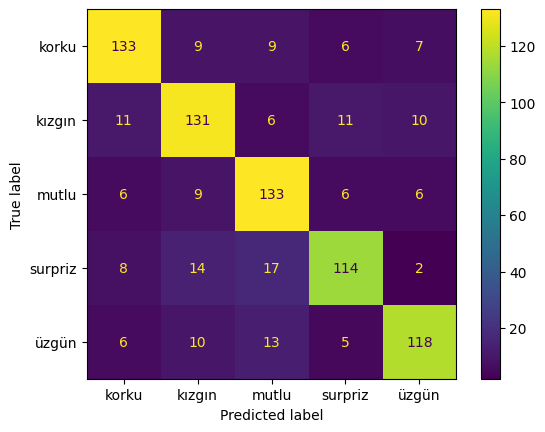

In [34]:
cm = confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

In [35]:
#from sklearn.neighbors import KNeighborsClassifier

msg_train,msg_test,label_train,label_test = train_test_split(df["word2vec"].tolist(),df["Label"].tolist(),test_size=0.2,random_state=42)
knn = Pipeline([('knn',KNeighborsClassifier())])
knn.fit(msg_train,label_train)
y_pred_class = knn.predict(msg_test)

print("knn accurary score: ", accuracy_score(label_test,y_pred_class))
print("knn f1 score: ", f1_score(label_test,y_pred_class,average="weighted"))

knn accurary score:  0.3575
knn f1 score:  0.35131913039608803


In [37]:
len(msg_test)

800

In [38]:
800*0.35

280.0